In [72]:
import pandas as pd 
import numpy as np 


In [73]:
data = pd.read_csv("data/cancer_reg.csv", encoding='latin-1')
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [74]:
!source ols/Scripts/activate


'source' is not recognized as an internal or external command,
operable program or batch file.


In [75]:
data.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [77]:
null_values=data.isnull().sum()
print(null_values[null_values>0])


PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64


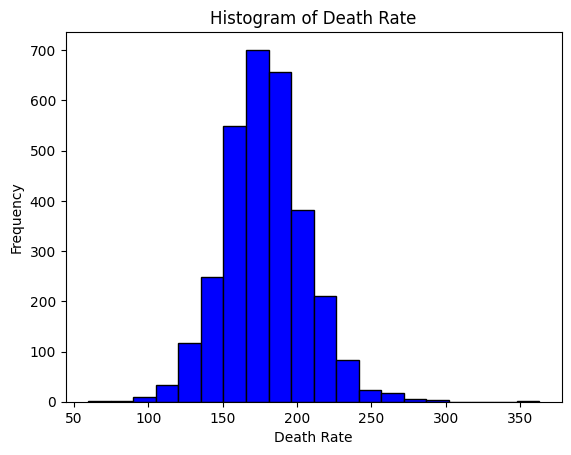

In [78]:
import matplotlib.pyplot as plt 
 
plt.hist(data['TARGET_deathRate'],bins=20,color='blue', edgecolor='black')
plt.xlabel('Death Rate') 
plt.ylabel('Frequency')
plt.title("Histogram of Death Rate")
plt.show() 

In [79]:
import plotly.graph_objects as go 

fig = go.Figure(data=[go.Box(y=data['TARGET_deathRate'],boxpoints='outliers',jitter=0.3,pointpos=-1.8)])
fig.update_layout(
    title='Boxplot of Death Rate',
    yaxis_title='Death Rate',
    width=700,
    height=500
)



Mean of the avgAnnCount: 606.3385437820807
Standard deviation of the avgAnnCount: 1416.3562232267052


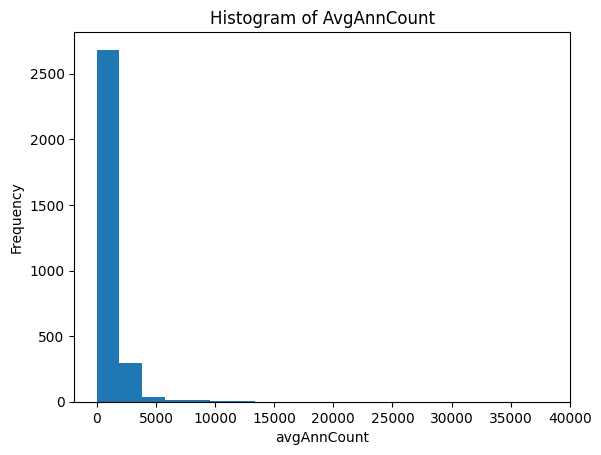

Correlation between avganncount and target_deathRAte: -0.14353161968868802


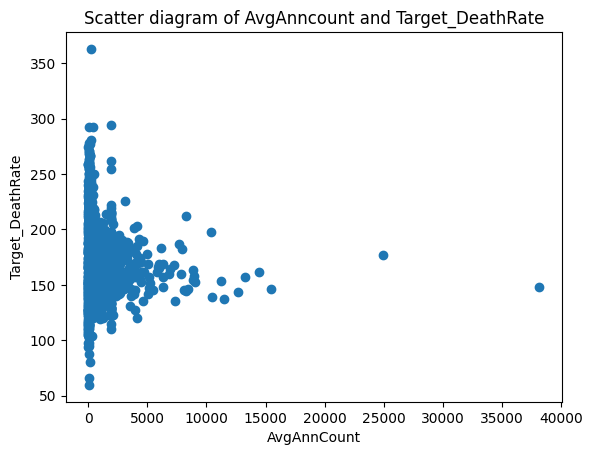

In [80]:
avg_ann_count_mean=data["avgAnnCount"].mean()
avg_ann_count_std=data["avgAnnCount"].std()
print("Mean of the avgAnnCount:",avg_ann_count_mean)
print("Standard deviation of the avgAnnCount:",avg_ann_count_std)

plt.hist(data["avgAnnCount"],bins=20)
plt.xlabel("avgAnnCount")
plt.ylabel("Frequency")
plt.title("Histogram of AvgAnnCount")
plt.show()

fig = go.Figure(data=[go.Box(y=data["avgAnnCount"],boxpoints='outliers',jitter=0.3,pointpos=-1.8)])
fig.update_layout(
    title='Boxplot of Death Rate',
    yaxis_title='Death Rate',
    width=700,
    height=500
)
fig.show()

corr=data["avgAnnCount"].corr(data["TARGET_deathRate"])
print("Correlation between avganncount and target_deathRAte:",corr)

plt.scatter(data["avgAnnCount"],data["TARGET_deathRate"])
plt.xlabel("AvgAnnCount")
plt.ylabel("Target_DeathRate")
plt.title("Scatter diagram of AvgAnncount and Target_DeathRate")
plt.show()









In [81]:
missing_values=data.isnull().sum()
print(missing_values[missing_values>0])

PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64


In [82]:
processed_data=pd.read_csv("data/cancer_reg_processed.csv")
processed_data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [83]:
from scipy.stats import normaltest

numericals_columns=processed_data.select_dtypes(include=np.number).columns
gaussian_cols=[]
non_gaussian_cols=[]
for col in numericals_columns:
    stat,p=normaltest(processed_data[col])
    print('statistics=%.3f,p=%.3f' %(stat,p))
    alpha=0.05
    if p > alpha:
        gaussian_cols.append(col)
    else:
        non_gaussian_cols.append
print(gaussian_cols)            

statistics=5028.465,p=0.000
statistics=5314.434,p=0.000
statistics=127.363,p=0.000
statistics=943.641,p=0.000
statistics=854.431,p=0.000
statistics=5801.694,p=0.000
statistics=408.566,p=0.000
statistics=4449.679,p=0.000
statistics=4715.992,p=0.000
statistics=42.880,p=0.000
statistics=48.305,p=0.000
statistics=2293.395,p=0.000
statistics=236.299,p=0.000
statistics=508.655,p=0.000
statistics=39.668,p=0.000
statistics=1395.030,p=0.000
statistics=55.596,p=0.000
statistics=536.946,p=0.000
statistics=87.619,p=0.000
statistics=471.048,p=0.000
statistics=73.543,p=0.000
statistics=9.139,p=0.010
statistics=20.036,p=0.000
statistics=1.039,p=0.595
statistics=114.894,p=0.000
statistics=933.419,p=0.000
statistics=1377.835,p=0.000
statistics=4033.108,p=0.000
statistics=3071.494,p=0.000
statistics=218.834,p=0.000
statistics=893.748,p=0.000
statistics=55.722,p=0.000
statistics=1290.293,p=0.000
statistics=847.167,p=0.000
statistics=10017.746,p=0.000
statistics=10017.746,p=0.000
statistics=10017.746,p=0.

In [84]:
len(gaussian_cols)

1

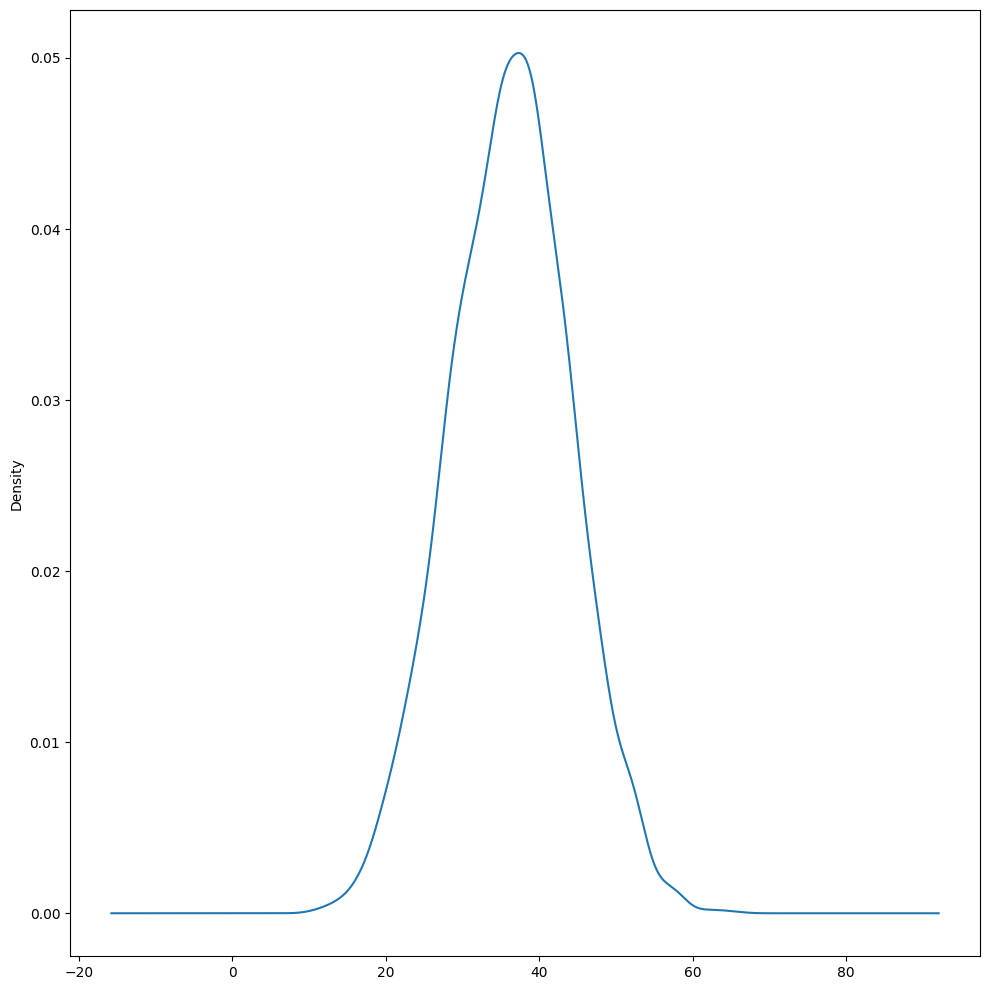

In [85]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
for i,col in enumerate(gaussian_cols):
    processed_data[col].plot(kind='density',ax=axes,subplots=True,sharex=False)
plt.tight_layout()
plt.show()    

In [86]:
gaussian_data=processed_data[gaussian_cols]
basic_info_gaussian=gaussian_data.describe()

In [87]:
basic_info_gaussian=basic_info_gaussian.loc[['mean','std','min','max']]
basic_info_gaussian

,PctPublicCoverage
mean,36.252642
std,7.841741
min,11.200000
max,65.100000


In [88]:
print("Highest allowed",basic_info_gaussian["PctPublicCoverage"]["mean"]+3*basic_info_gaussian["PctPublicCoverage"]["std"])
print("Lowest allowed",basic_info_gaussian["PctPublicCoverage"]["mean"]-3*basic_info_gaussian["PctPublicCoverage"]["std"])

processed_data[(processed_data['PctPublicCoverage']>59.777864755203105) |(processed_data['PctPublicCoverage']<12.727419130586192)] 



Highest allowed 59.777864755203105
Lowest allowed 12.727419130586192


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
176,25.0,10,134.3,359.0,27627,4596,24.2,0.000000,42.6,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,862.0,283,136.5,364.9,122641,375629,3.9,449.912014,35.3,34.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1486,1067.0,358,142.9,444.5,51907,118891,10.9,84.110656,65.3,64.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2713,8.0,3,203.3,201.3,68387,5702,9.9,0.000000,36.8,38.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2740,129.0,54,126.1,332.0,32533,20152,22.8,0.000000,54.8,54.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
def deal_with_outliers(df,col,basic_info):
    highest_allowed=basic_info[col]["mean"]+3*basic_info[col]["std"]
    lowest_allowed=basic_info[col]["mean"]-3*basic_info[col]["std"]
    df=df[(df[col]>highest_allowed) | (df[col]<lowest_allowed)]
    return df
cols_have_outliers=[]
for col in gaussian_cols:
    df=deal_with_outliers(gaussian_data,col,basic_info_gaussian)
    shape=df.shape
    if shape[0]>0:
        cols_have_outliers.append(col)
print(cols_have_outliers)        

['PctPublicCoverage']


In [90]:

#trimming 
for col in cols_have_outliers:
    highest_allowed=basic_info_gaussian[col]["mean"]+3*basic_info_gaussian[col]["std"]
    lowest_allowed=basic_info_gaussian[col]["mean"]-3*basic_info_gaussian[col]["std"]
    trimmed_data=processed_data[(processed_data[col]<highest_allowed)&(processed_data[col]>lowest_allowed)]
trimmed_data

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
#capping 
for col in cols_have_outliers:
    highest_allowed=basic_info_gaussian[col]["mean"]+3*basic_info_gaussian[col]["std"]
    lowest_allowed=basic_info_gaussian[col]["mean"]-3*basic_info_gaussian[col]["std"]
    capped_data=processed_data.copy()
    capped_data.loc[capped_data[col]<highest_allowed,col]=highest_allowed
    capped_data.loc[capped_data[col]>lowest_allowed,col]=lowest_allowed
capped_data    

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
cols_to_remove=[]
for col in processed_data.columns:
    if processed_data[col].nunique()<10:
        cols_to_remove.append(col)
print(len(cols_to_remove))
data_for_skewness=processed_data.drop(cols_to_remove,axis=1)        

1870


In [93]:
def identify_skewed_cols(df,cols):
    skewed_cols=[]
    for col in cols:
        skew=df[col].skew()
        if skew>1 or skew<-1:
            skewed_cols.append(col)
    return skewed_cols
skewed_cols=identify_skewed_cols(data_for_skewness,data_for_skewness.columns)
len(skewed_cols)
        

16

In [94]:
skewed_data=data_for_skewness[skewed_cols]

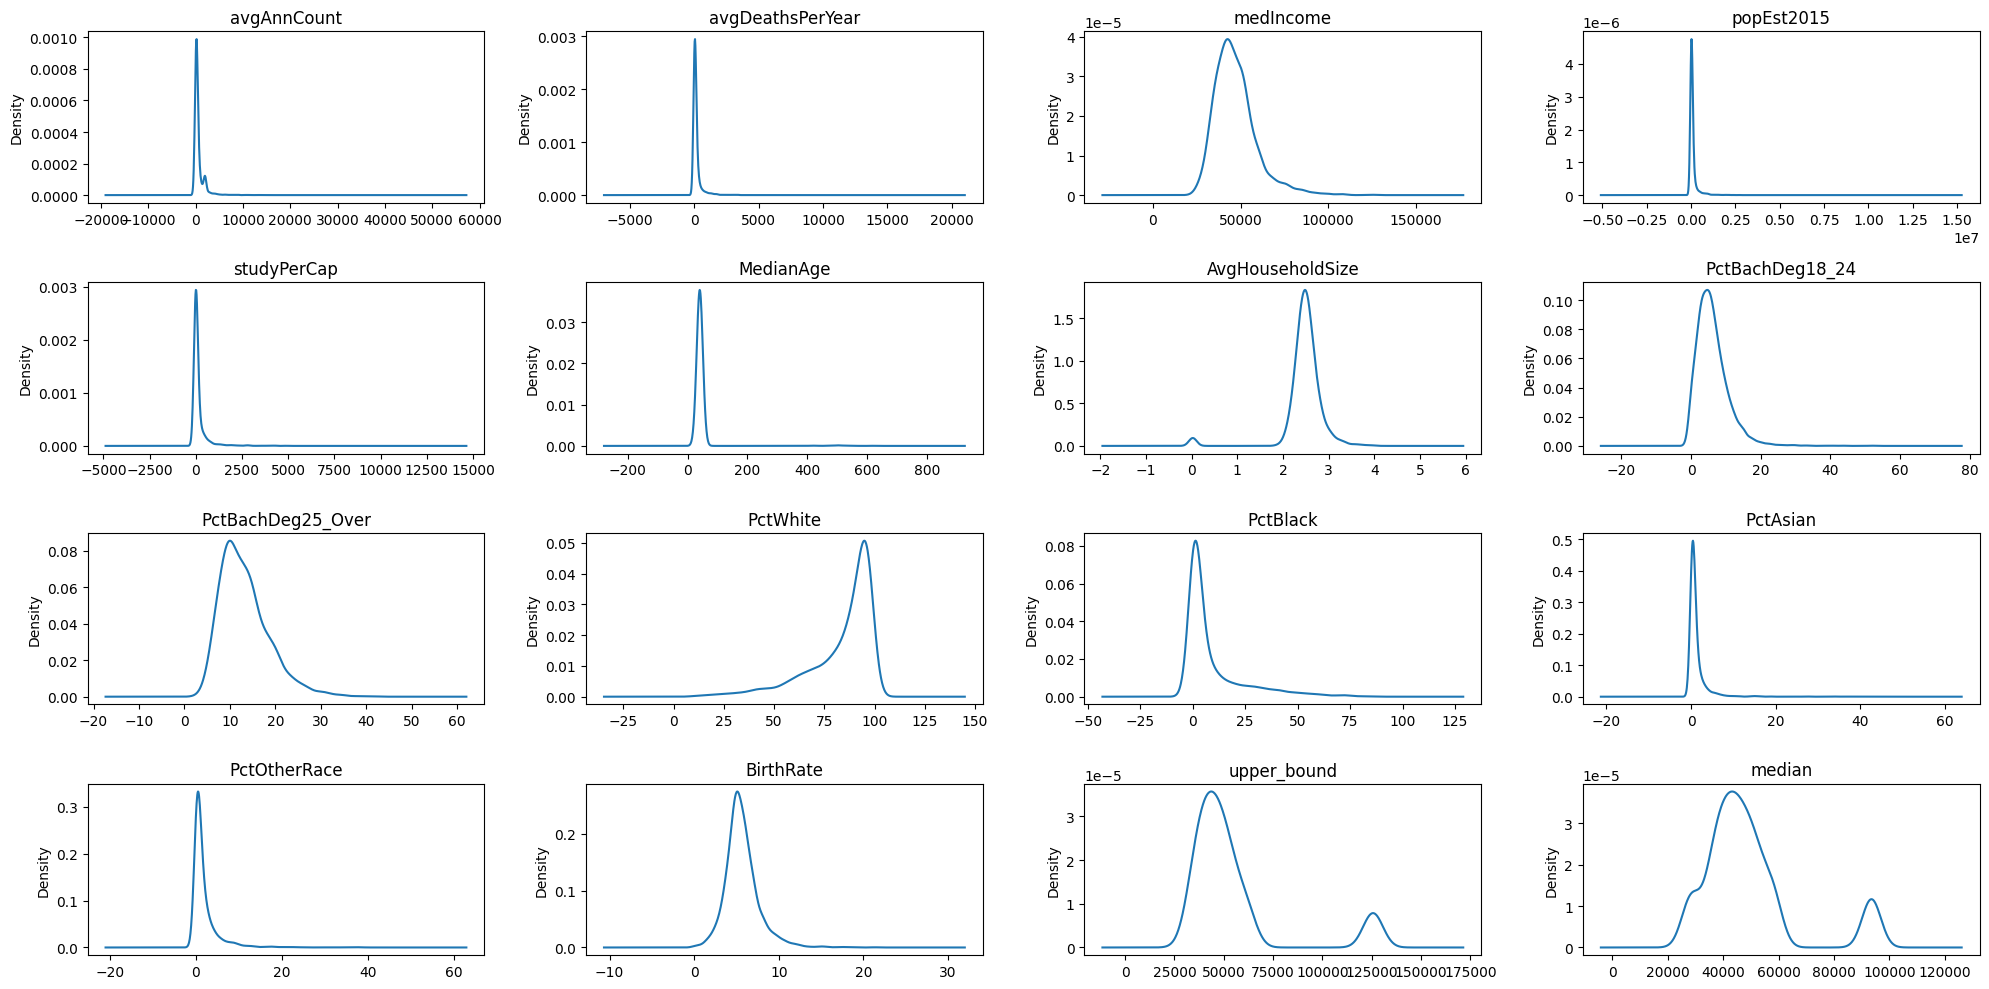

In [95]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(20,10))
for i,col in enumerate(skewed_cols):
    axes[i//4,i%4].set_title(col)
    skewed_data[col].plot(kind='density',ax=axes[i//4,i%4],subplots=True,sharex=False)
plt.tight_layout()
plt.show()    

In [97]:
import plotly.graph_objects as go

def box_plot(df, col):
    fig = go.Figure(data=[go.Box(y=df[col], boxpoints='outliers', jitter=0.3, pointpos=-1.8)])
    fig.update_layout(
        title='Boxplot of ' + col,
        yaxis_title=col,
        width=500,
        height=500
    )
    fig.show()

# Assuming 'skewed_cols' is already defined and contains valid column names
for col in skewed_cols:
    box_plot(processed_data, col)


In [104]:
def deal_with_outliers_with_iqr(df, col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25  # Corrected calculation for IQR
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr  # Corrected lower limit calculation
    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    return outliers

cols_have_outliers_skewed = []
for col in skewed_cols:
    outliers = deal_with_outliers_with_iqr(processed_data, col)
    shape = outliers.shape
    if shape[0] > 0:  # Access the first element of the shape tuple (number of rows)
        cols_have_outliers_skewed.append(col)

print(cols_have_outliers_skewed)


['avgAnnCount', 'avgDeathsPerYear', 'medIncome', 'popEst2015', 'studyPerCap', 'MedianAge', 'AvgHouseholdSize', 'PctBachDeg18_24', 'PctBachDeg25_Over', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'BirthRate', 'upper_bound', 'median']


In [107]:
percentitle25=processed_data['studyPerCap'].quantile(0.25)
percentitle75=processed_data['studyPerCap'].quantile(0.75)

iqr=percentitle75-percentitle25

upper_limit=percentitle75 + 1.5*iqr
lower_limit=percentitle25 - 1.5*iqr

print("Upper_limit",upper_limit)
print("lower_limit",lower_limit)

processed_data[(processed_data['studyPerCap'] > upper_limit)| (processed_data['studyPerCap'] <  lower_limit)]

Upper_limit 209.1269406875
lower_limit -125.4761644125


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,4025.000000,1380,177.8,510.900000,60397,843954,13.1,427.748432,35.8,34.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,740.000000,269,172.7,499.300000,51395,121846,15.7,837.122269,41.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14,2265.000000,901,171.0,440.700000,50083,490945,16.3,462.373586,37.2,35.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,1962.667684,138,153.7,453.549422,49246,118053,19.4,660.720185,28.8,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3039,1962.667684,9,208.3,453.549422,49256,2968,10.5,673.854447,45.2,45.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3041,1962.667684,48,146.4,453.549422,49508,29029,13.0,723.414516,32.2,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
#trimming
rows_to_remove=processed_data[(processed_data['studyPerCap'] > upper_limit)| (processed_data['studyPerCap'] <  lower_limit)]
trimmed_data=processed_data[(processed_data['studyPerCap'] < upper_limit)& (processed_data['studyPerCap'] >  lower_limit)]
trimmed_data.shape

(2543, 1904)

In [114]:
def capping(df,col):
    percentitle25=df[col].quantile(0.25)
    percentitle75=df[col].quantile(0.75)
    iqr=percentitle75-percentitle25
    upper_limit=percentitle75+1.5*iqr
    lower_limit=percentitle25+1.5*iqr
    df.loc[df[col]>upper_limit,col]=upper_limit
    df.loc[df[col]>lower_limit,col]=lower_limit
    return df
for col in cols_have_outliers_skewed:
    capped_data=capping(processed_data,col)
capped_data.shape    

C:\Users\hamda\AppData\Local\Temp\ipykernel_19064\787473008.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '330.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\hamda\AppData\Local\Temp\ipykernel_19064\787473008.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72906.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\hamda\AppData\Local\Temp\ipykernel_19064\787473008.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '154151.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



(3047, 1904)

In [115]:
for col in cols_have_outliers_skewed:
    box_plot(capped_data,col)

In [116]:
capped_data.to_csv('data/capped_data.csv',index=False)